# Mchezopesa Ltd Analysis

## **Defining the question**

Predicting the outcome of a game between team 1 and team 2 based on who is at home and who is away, as well as whether or not the game is friendly.

## **Our metric for success**

The RMSE score will be used to assess the performance of the regression models. The confusion matrix and classification report will be used to determine classifier accuracy.

## **Understanding the context**

The management of Mchezopesa Ltd is interested in a prediction result of a game between team 1 and team 2, based on who is at home and who is away, and whether or not the game is friendly. Data from football matches and FIFA rankings has been made available for analysis.

## **Experimental design approach**
- Data Exploration
- Feature Engineering
- Data Analysis
- Modelling
- Results and Conclusions
- Challenging Solution

## **Appropriateness of the data**


## **Importing libraries**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## Loading our dataset

In [ ]:
# Loading our dataset
rank = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')

In [ ]:
# Previewing our dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# Previewing our datset
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
# Previewing our dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Previewing our dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Shape of our dataset
print(rank.shape)
print(results.shape)

(57793, 16)
(40839, 9)


Our fifa rank dataset has 57793 rows and 16 columns.
Our results dataset has 40839 rows and 9 columns

In [ ]:
# Describe our rank data
rank.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
# Describing our results data
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## Tidying our dataset

In [ ]:
# Checking for duplicates
rank.duplicated().sum()

37

There are 37 duplicates in our ranking dataset.We are going to drop this duplicates.

In [ ]:
# Dropping our duplicates
rank.drop_duplicates(inplace=True)

In [ ]:
# Checking for duplicates
results.duplicated().sum()

# There are no dupilcates in our results dataset.

0

In [ ]:
# Check for unique values in our dataset
col = ['country_full', 'confederation']

for col in col:
  print(rank[col].unique())

['Germany' 'Italy' 'Switzerland' 'Sweden' 'Argentina'
 'Republic of Ireland' 'Russia' 'Brazil' 'Norway' 'Denmark' 'England'
 'France' 'Spain' 'Mexico' 'RCS' 'Netherlands' 'Nigeria' 'Belgium'
 'Colombia' 'Poland' 'Romania' 'Uruguay' 'Portugal' 'Cameroon' 'Zambia'
 'Egypt' 'Wales' 'USA' "Côte d'Ivoire" 'Scotland' 'Tunisia' 'Greece'
 'Morocco' 'Algeria' 'Ecuador' 'Korea Republic' 'Bulgaria' 'Austria'
 'Costa Rica' 'Northern Ireland' 'Honduras' 'Hungary' 'Japan'
 'Saudi Arabia' 'China PR' 'Canada' 'Finland' 'Ghana' 'Chile' 'Zimbabwe'
 'Qatar' 'Australia' 'Iceland' 'IR Iran' 'United Arab Emirates'
 'Yugoslavia' 'Iraq' 'Senegal' 'Bolivia' 'Kuwait' 'Korea DPR'
 'El Salvador' 'Turkey' 'Gabon' 'Guinea' 'Thailand' 'Paraguay' 'Malawi'
 'Israel' 'Peru' 'Zaire' 'Cyprus' 'Singapore' 'Mali' 'Malaysia' 'Bermuda'
 'Niger' 'Syria' 'Bahrain' 'New Zealand' 'Madagascar' 'Malta' 'Jamaica'
 'Lithuania' 'Trinidad and Tobago' 'Sierra Leone' 'Jordan' 'Kenya'
 'Latvia' 'Yemen' 'Tanzania' 'Albania' 'Angola' 'Vene

In [ ]:
rcolumn = ['home_team', 'away_team', 'tournament','neutral']

for col in rcolumn:
  print(f'Column: {col}')
  print(results[col].unique())
  print('\n')

Column: home_team
['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis' 'Panama' 'Slovakia'
 'Manchukuo' 'Croatia' 'Nicaragua' 'Afghanistan' 'India' 'Martinique'
 'Zimbabwe' '

In [ ]:
# Dropping certain columns that aren't as relevant in the analysis
rank.drop(columns=['cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
       'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'country_abrv'], inplace=True)


In [ ]:
#Drop the irrelevant columns (reults dataset)

results.drop(columns=['city'], inplace=True)

In [ ]:
#Rename the country_full column to country
rank.rename({'country_full': 'country'}, axis = 1, inplace = True)

In [ ]:
# Displaying the ranking data
rank.head()

,rank,country,total_points,previous_points,rank_change,rank_date
0,1,Germany,0.0,57,0,1993-08-08
1,2,Italy,0.0,57,0,1993-08-08
2,3,Switzerland,0.0,50,9,1993-08-08
3,4,Sweden,0.0,55,0,1993-08-08
4,5,Argentina,0.0,51,5,1993-08-08


In [ ]:
# Displaying results data
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [ ]:
# Converting date column to date type
results['date'] = pd.to_datetime(results['date'])
rank['rank_date'] = pd.to_datetime(rank['rank_date'])

In [ ]:
# Determine years in rank data
rank['rank_date'].dt.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [ ]:
# Determine years in results data:
results['date'].dt.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [ ]:
# Dropping the row entries before 1993 since they do not have corresponding records 
# in the ranking  dataframe.
results = results[results["date"] > '1993-01-01']
results.shape

# dropped 40839-23477 = 17362 row entries

(23477, 8)

In [ ]:
# Separating the date column into Year and Month of the results and ranking dataset
# Creating year and month variables
results['year'] = results.date.dt.year
results['month'] =results.date.dt.month

In [ ]:
rank['year'] = rank.rank_date.dt.year
rank['month'] =rank.rank_date.dt.month

In [ ]:
# Viewing our rank dataset
rank.head()

,rank,country,total_points,previous_points,rank_change,rank_date,year,month
0,1,Germany,0.0,57,0,1993-08-08,1993,8
1,2,Italy,0.0,57,0,1993-08-08,1993,8
2,3,Switzerland,0.0,50,9,1993-08-08,1993,8
3,4,Sweden,0.0,55,0,1993-08-08,1993,8
4,5,Argentina,0.0,51,5,1993-08-08,1993,8


In [ ]:
# Viewing our reults dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1
17366,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1


**Merging the two datasets to obtain the home_team ranking dataset**

In [ ]:
# Merging results and rank datsets to get home rank

home_rank = pd.merge(rank, results, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','home_team'])

In [ ]:
home_rank.head()

,rank,country_x,total_points,previous_points,rank_change,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country_y,neutral
0,4,Sweden,0.0,55,0,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,4,Sweden,0.0,55,0,1993-08-08,1993,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False
2,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False
3,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False
4,8,Brazil,0.0,55,-5,1993-08-08,1993,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False


In [ ]:
# Dropping irrelevant columns
home_rank.drop(columns=['country_y','rank_date','date'], inplace=True)

In [ ]:
# Renaming certain columns
home_rank.country_x = home_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)
home_rank.rank = home_rank.rename({'rank': 'home_rank'}, axis = 1, inplace = True)

# display dataset
home_rank.head()

## The country is similar to the home_team in the home_rank dataset.

,home_rank,country,total_points,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,neutral
0,4,Sweden,0.0,55,0,1993,8,Sweden,Switzerland,1,2,Friendly,False
1,4,Sweden,0.0,55,0,1993,8,Sweden,France,1,1,FIFA World Cup qualification,False
2,5,Argentina,0.0,51,5,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False
3,5,Argentina,0.0,51,5,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,False
4,8,Brazil,0.0,55,-5,1993,8,Brazil,Mexico,1,1,Friendly,False


In [ ]:
# Rearrange the home_rank dataset

home_rank = home_rank[['home_rank','rank_change','country','home_team','away_team','home_score','away_score','tournament','neutral','month','year','total_points','previous_points']]

home_rank.head()

,home_rank,rank_change,country,home_team,away_team,home_score,away_score,tournament,neutral,month,year,total_points,previous_points
0,4,0,Sweden,Sweden,Switzerland,1,2,Friendly,False,8,1993,0.0,55
1,4,0,Sweden,Sweden,France,1,1,FIFA World Cup qualification,False,8,1993,0.0,55
2,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51
3,5,5,Argentina,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,8,1993,0.0,51
4,8,-5,Brazil,Brazil,Mexico,1,1,Friendly,False,8,1993,0.0,55


**Merging the two datasets to obtain the away_team ranking dataset**

In [ ]:
# Merging datasets
away_rank = pd.merge(rank, results, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','away_team'])

In [ ]:
away_rank.head()

,rank,country_x,total_points,previous_points,rank_change,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country_y,neutral
0,3,Switzerland,0.0,50,9,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False
2,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False
3,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False
4,8,Brazil,0.0,55,-5,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False


In [ ]:
# Dropping irrelevant columns

away_rank.drop(columns=['country_y','rank_date','date'], inplace=True)

In [ ]:
# Rename certain columns
away_rank.rank = away_rank.rename({'rank': 'away_rank'}, axis = 1, inplace = True)
away_rank.country_x = away_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)

away_rank.head()

,away_rank,country,total_points,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,neutral
0,3,Switzerland,0.0,50,9,1993,8,Sweden,Switzerland,1,2,Friendly,False
1,5,Argentina,0.0,51,5,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,False
2,5,Argentina,0.0,51,5,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,False
3,5,Argentina,0.0,51,5,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification,False
4,8,Brazil,0.0,55,-5,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification,False


In [ ]:
#Rearrange the away_rank dataset

away_rank = away_rank[['away_rank','away_team','month','year']]

away_rank.head()

,away_rank,away_team,month,year
0,3,Switzerland,8,1993
1,5,Argentina,8,1993
2,5,Argentina,8,1993
3,5,Argentina,8,1993
4,8,Brazil,8,1993


**Merge to create a final Dataset (home rank and away rank)**

In [ ]:
# Merge the home_rank and away_rank datasets using the away_team, month and year
# We want the final dataset to contain home rank and away rank.
home_away = pd.merge(home_rank, away_rank, how = 'inner', left_on = ['year', 'month','away_team'], right_on = ['year', 'month','away_team'])
home_away.head()

,home_rank,rank_change,country,home_team,away_team,home_score,away_score,tournament,neutral,month,year,total_points,previous_points,away_rank
0,4,0,Sweden,Sweden,Switzerland,1,2,Friendly,False,8,1993,0.0,55,3
1,4,0,Sweden,Sweden,France,1,1,FIFA World Cup qualification,False,8,1993,0.0,55,12
2,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70
3,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70
4,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70


In [ ]:
#Rearrange the home_away dataset

final_df = home_away[['home_rank','away_rank','country','home_team','away_team','home_score','away_score','tournament','month','year','neutral','total_points','previous_points']]

final_df.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,neutral,total_points,previous_points
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,False,0.0,55
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,False,0.0,55
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,False,0.0,51
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,False,0.0,51
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,False,0.0,51


**Checking for outliers**

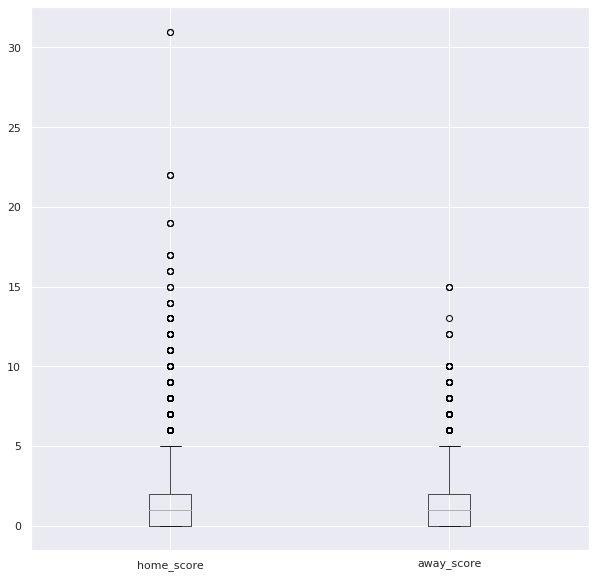

In [ ]:
out=['home_score','away_score']

plt.subplots(figsize=(10,10))
final_df.boxplot(out)

plt.title=('Checking for Outliers in Home and Away scores')
plt.show()


There are many outliers clearly seen but we can not drop them since they are viable values that do affect the overall outcome of out prediction model.





## Feature Engineering

In [ ]:
# Creating a status column that indicates if home team wins or loses
conditions = [
              final_df['home_score'] > final_df['away_score'],
              final_df['home_score'] < final_df['away_score'],
              final_df['home_score'] == final_df['away_score']
]

values = ['Win', 'Loss', 'Draw']

final_df['status'] = np.select(conditions, values)

In [ ]:
final_df.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,neutral,total_points,previous_points,status
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,False,0.0,55,Loss
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,False,0.0,55,Draw
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,False,0.0,51,Win
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,False,0.0,51,Win
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,False,0.0,51,Win


In [ ]:
# We have to specify the tournament type in three categories : 
#   1. FIFA World Cup
#   2. Friendly
#   3. Other

def tournament(ttype):
    if ttype == 'Friendly':
        return 'Friendly'
    elif ttype == 'FIFA World Cup':
        return 'FIFA World cup'
    else:
        return 'Other'
      
final_df['tournament_type'] = final_df.tournament.apply(lambda t: tournament(t))

In [ ]:
final_df.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,neutral,total_points,previous_points,status,tournament_type
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,False,0.0,55,Loss,Friendly
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,False,0.0,55,Draw,Other
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,False,0.0,51,Win,Other
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,False,0.0,51,Win,Other
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,False,0.0,51,Win,Other


In [ ]:
# Dropping the tournament column

final_df.drop(columns=['tournament'], inplace=True)

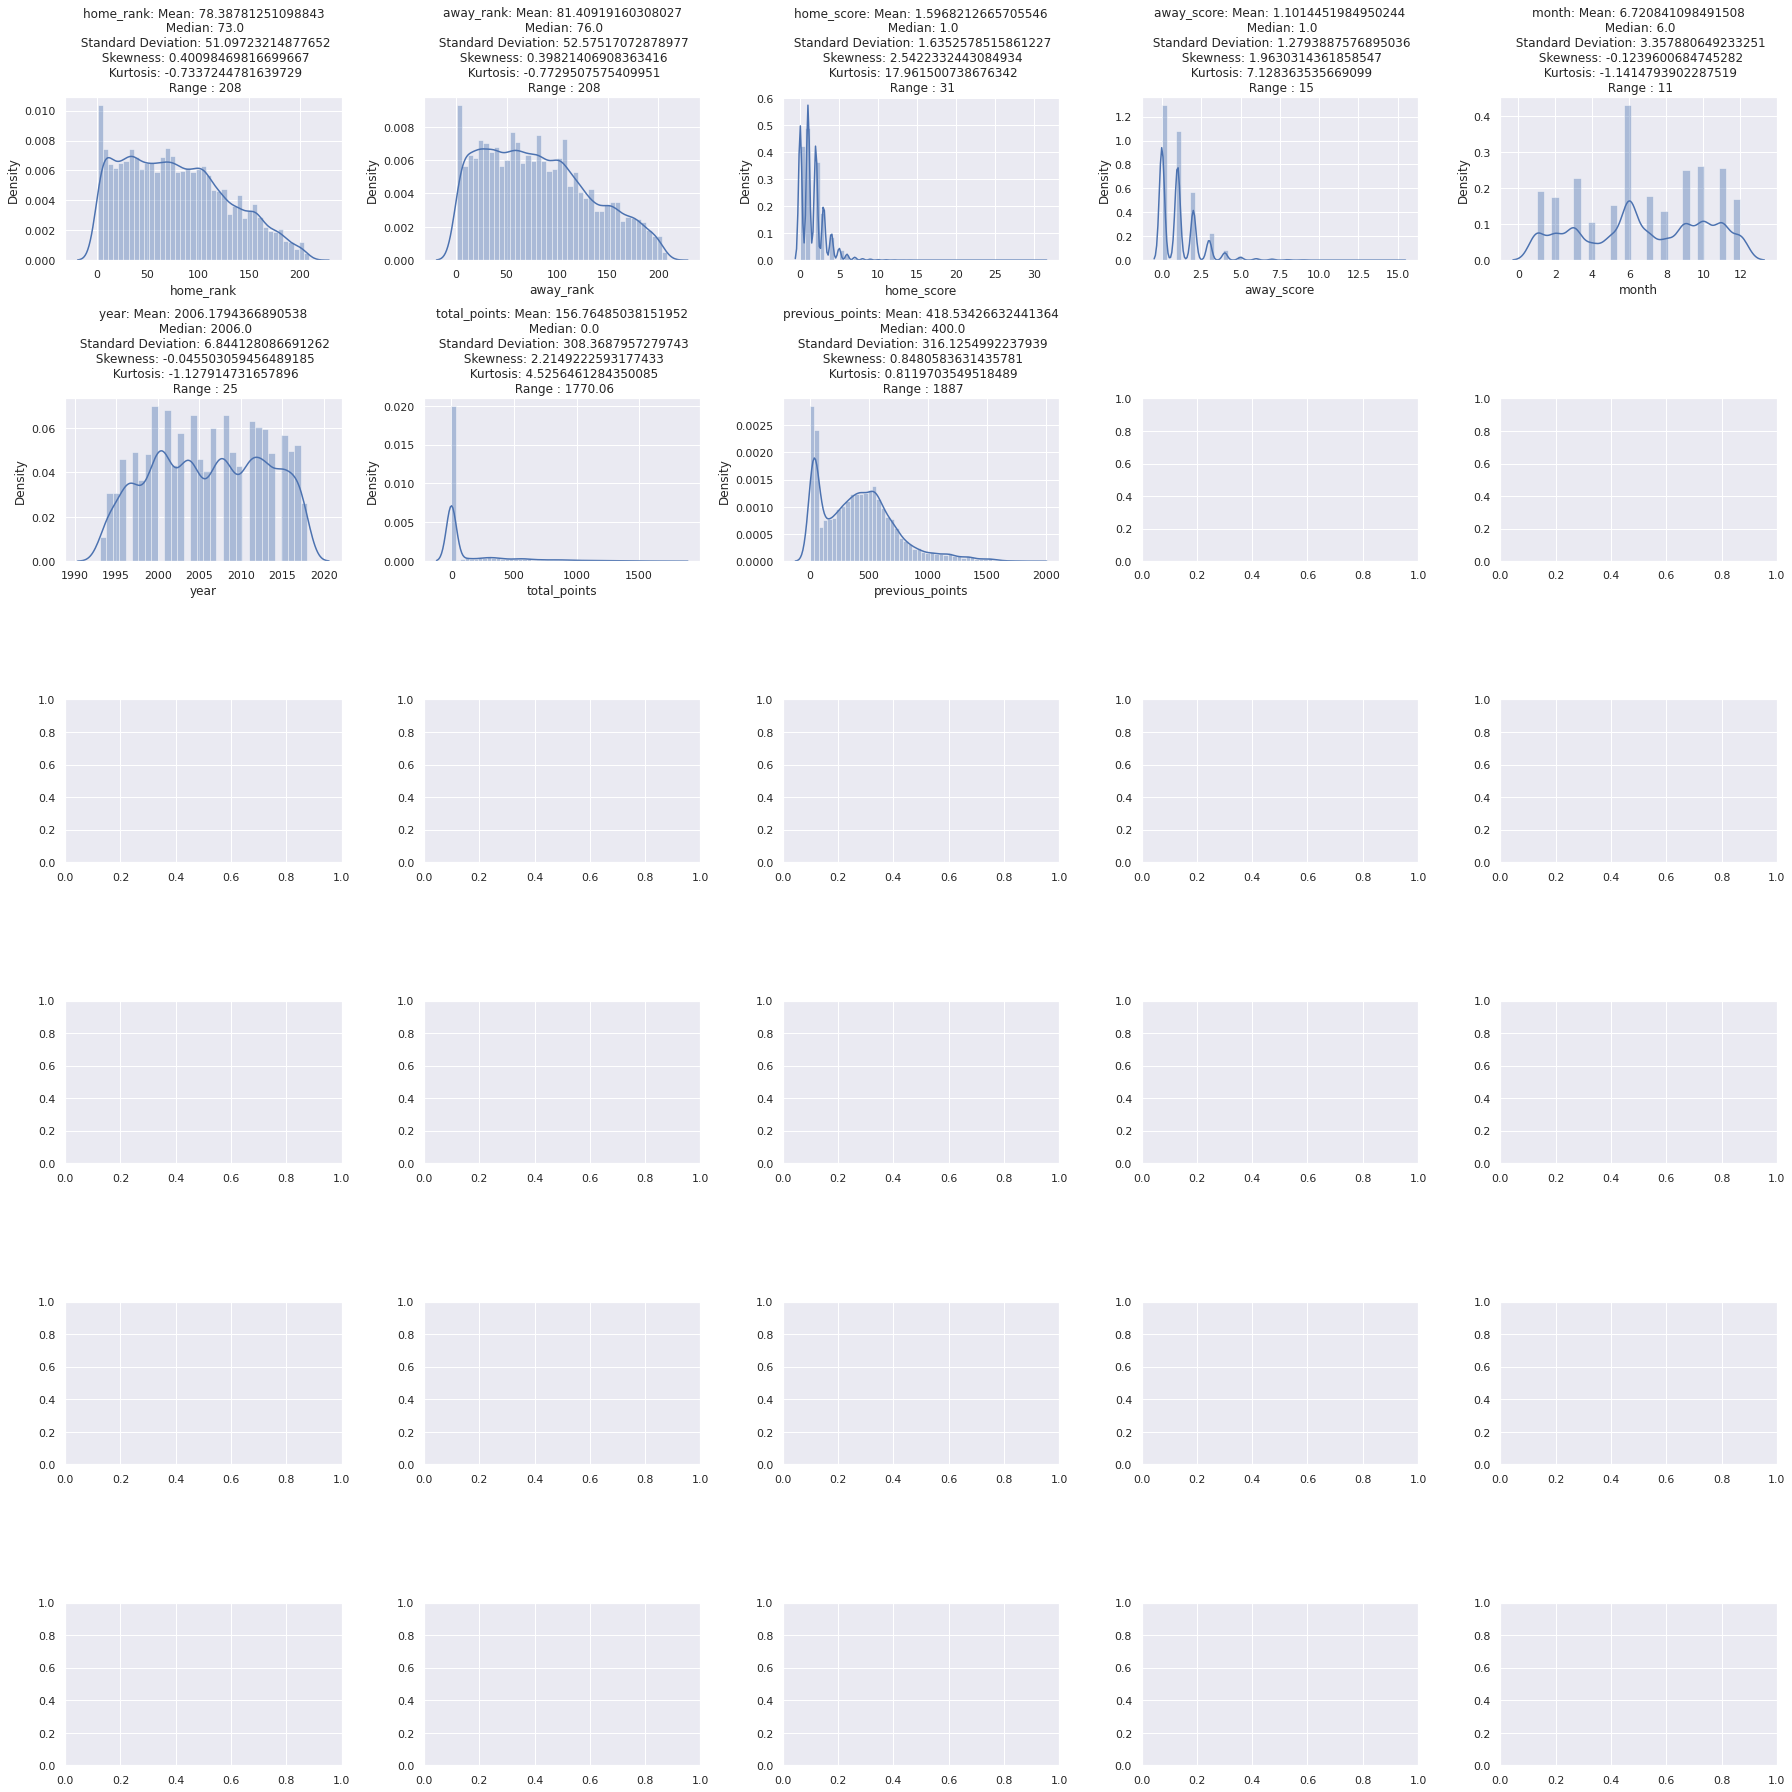

In [ ]:
# Univariate analysis of numerical variables
num_var = final_df.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25, 25))

for col, ax in zip(num_var, axes.flatten()):

  mean = final_df[col].mean()
  median = final_df[col].median()
  standard_var = final_df[col].std()
  skew = final_df[col].skew()
  kurt = final_df[col].kurt()
  range = final_df[col].max() - final_df[col].min()

  sns.distplot(final_df[col], hist=True, ax=ax)
  ax.set_title(f'{col}: Mean: {mean}\n Median: {median}\n Standard Deviation: {standard_var}\n Skewness: {skew}\n Kurtosis: {kurt}\n Range : {range}')

plt.tight_layout()

In [ ]:
# Get crosstabulation between neutral column and home game result
table_neutral = pd.crosstab(final_df['status'], final_df['neutral'])
table_neutral

neutral,False,True
status,,
Draw,4677,2169
Loss,4852,3229
Win,9746,3766


In [ ]:
# The neutrality of where the game was played seems to have an influence on whether the game result. 
# A chi-square test can be used to test this hypothesis.

# H0: There is no relationship between neutrality of where a match was played and the game results
# H1: There is a relationship between neutrality of where a match was played and game results

In [ ]:
# chi-square test with alpha 0.05
stat, p, dof, expected = chi2_contingency(table_neutral.to_numpy())

#Calculate critical value, set significance level to 0.05
prob = 0.95
critical_value = chi2.ppf(prob, dof)

print(f'Critical value: {critical_value}, test_statistic: {stat}, alpha: {1-prob}, p_value: {p}')

Critical value: 5.991464547107979, test_statistic: 339.43900195273613, alpha: 0.050000000000000044, p_value: 1.9577500989494194e-74



p-value is less than alpha, significant evidence to reject the null hypothesis.

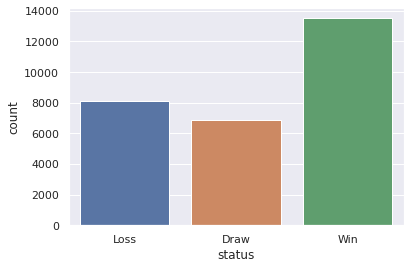

In [ ]:
# Check for distribution among classes
sns.countplot(final_df['status'])

Matches where the home team won are quite high in number in comparison to matches where the home team lost or there was a draw.

## **Multicollinearity check**

In [ ]:
#Are the independent variables correlated? We get the Pearson's correlation to find out. 

corr = final_df.corr()

corr

,home_rank,away_rank,home_score,away_score,month,year,neutral,total_points,previous_points
home_rank,1.000000,0.515308,-0.114510,0.221365,0.067434,0.091889,0.018182,-0.299439,-0.652942
away_rank,0.515308,1.000000,0.307728,-0.151487,0.068120,0.091281,0.031894,-0.147924,-0.310923
home_score,-0.114510,0.307728,1.000000,-0.161033,0.020218,-0.052214,-0.050949,0.012154,0.069234
away_score,0.221365,-0.151487,-0.161033,1.000000,0.019419,-0.012372,0.128937,-0.061949,-0.130760
month,0.067434,0.068120,0.020218,0.019419,1.000000,-0.008268,-0.088753,0.011014,-0.068743
year,0.091889,0.091281,-0.052214,-0.012372,-0.008268,1.000000,0.037727,0.624147,0.408979
neutral,0.018182,0.031894,-0.050949,0.128937,-0.088753,0.037727,1.000000,0.048297,0.016905
total_points,-0.299439,-0.147924,0.012154,-0.061949,0.011014,0.624147,0.048297,1.000000,0.546987
previous_points,-0.652942,-0.310923,0.069234,-0.130760,-0.068743,0.408979,0.016905,0.546987,1.000000


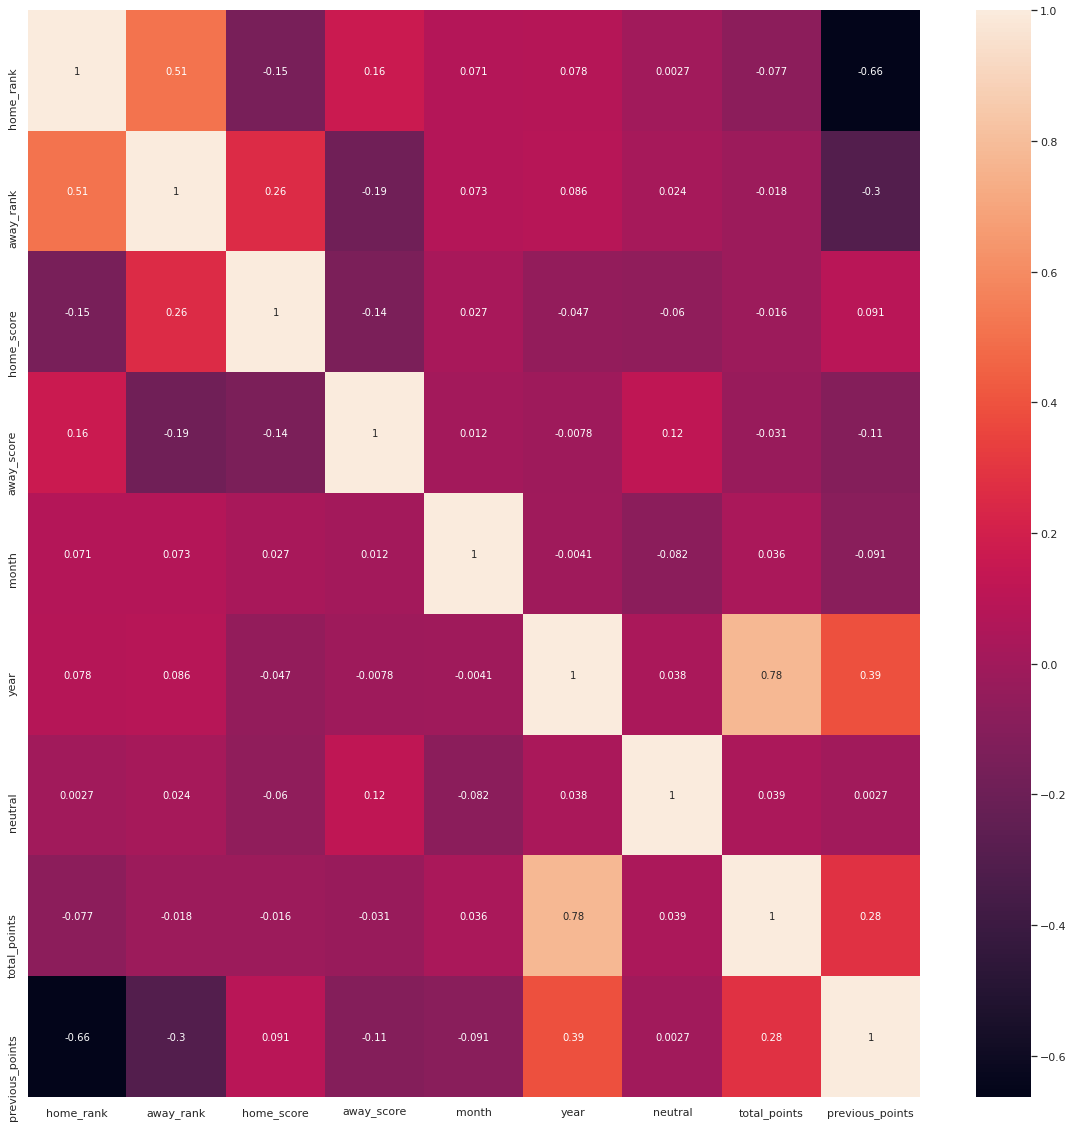

In [ ]:
# Display a heatmap
# Test for multicollinearity
plt.figure(figsize=(20, 20))
sns.heatmap(final_df.corr(method='spearman'), annot=True)

Using VIF to check Multicollinearity

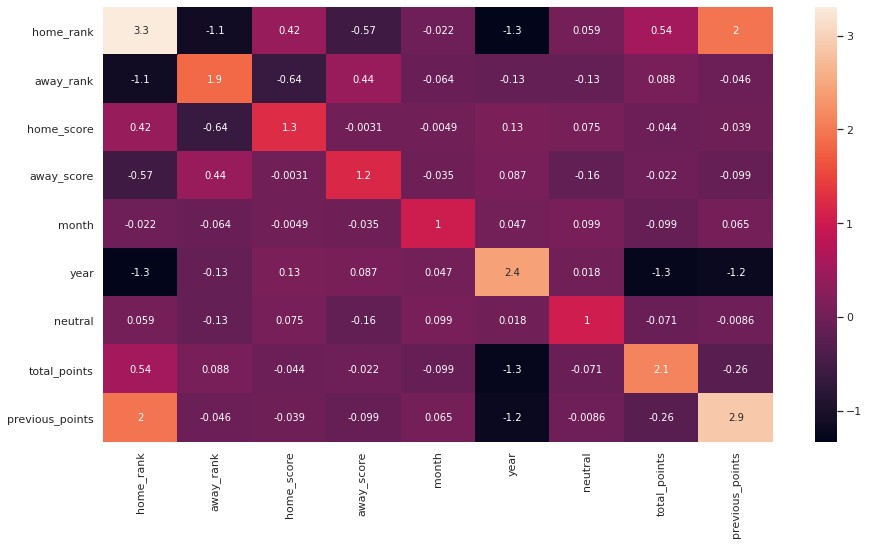

In [ ]:
vif_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

#Plot a heatmap

sns.set_style('dark')
plt.subplots(figsize =  (15,8))
sns.heatmap(vif_df, annot = True)


plt.show()

There is no formal VIF value for determining presence of multicollinearity. Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.

Our features are independent.

## **MODELLING**

## Polynomial regression

In [ ]:
# selecting the columns for modelling and converting them to a csv
match = final_df[['home_team','away_team','home_score','away_score','tournament_type','home_rank','away_rank','status']]
match.to_csv('fifa_dataset.csv')
match = pd.read_csv('fifa_dataset.csv')

In [ ]:
match.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,status
0,0,Sweden,Switzerland,1,2,Friendly,4,3,Loss
1,1,Sweden,France,1,1,Other,4,12,Draw
2,2,Argentina,Peru,2,1,Other,5,70,Win
3,3,Argentina,Peru,2,1,Other,5,70,Win
4,4,Argentina,Peru,2,1,Other,5,70,Win


In [ ]:
#Drop the Unnamed: 0 column
match.drop(columns=['Unnamed: 0'], inplace=True)
match.head()

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,status
0,Sweden,Switzerland,1,2,Friendly,4,3,Loss
1,Sweden,France,1,1,Other,4,12,Draw
2,Argentina,Peru,2,1,Other,5,70,Win
3,Argentina,Peru,2,1,Other,5,70,Win
4,Argentina,Peru,2,1,Other,5,70,Win


**Predicting the home score using Polynomial Regression**

In [ ]:
# Creating the X and y variables

X = match.iloc[:, [0, 1, 3, 4, 5, 6]]
y = match.home_score

print(X.head())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(y.head())

   home_team    away_team  away_score tournament_type  home_rank  away_rank
0     Sweden  Switzerland           2        Friendly          4          3
1     Sweden       France           1           Other          4         12
2  Argentina         Peru           1           Other          5         70
3  Argentina         Peru           1           Other          5         70
4  Argentina         Peru           1           Other          5         70
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    1
1    1
2    2
3    2
4    2
Name: home_score, dtype: int64


In [ ]:
# Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

In [ ]:
#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

If you don't specify random state in your code, a new random value is created each time you run(execute) your code, and the train and test datasets will have different values each time.

If a fixed value is assigned, such as random state = 42, the output will be the same no matter how many times your function is run.
i.e., the train and test datasets have the same values.

In [ ]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [ ]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Making predictions

y_pred = regressor.predict(X_test)

In [ ]:
# Measuring the accuracy of the model

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.3669222743782399


The RMSE score is quite high, since a fifth of the mean is significantly lower than 1.3669

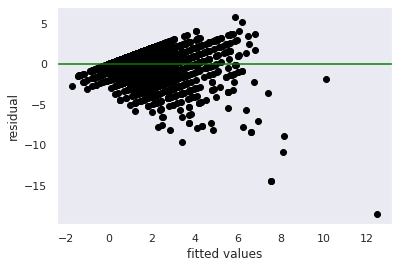

In [ ]:
# Perform a bartlett test 
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

In [ ]:
# heteroskedasticity test using barletts test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


the variances are homogeneous!


**Predicting the Away score**

In [ ]:
# Creating the X and y variables

X = match.iloc[:, [0, 1, 2, 4, 5, 6]]
y = match.away_score

print(X.head())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(y.head())

   home_team    away_team  home_score tournament_type  home_rank  away_rank
0     Sweden  Switzerland           1        Friendly          4          3
1     Sweden       France           1           Other          4         12
2  Argentina         Peru           2           Other          5         70
3  Argentina         Peru           2           Other          5         70
4  Argentina         Peru           2           Other          5         70
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    2
1    1
2    1
3    1
4    1
Name: away_score, dtype: int64


In [ ]:
#Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

In [ ]:
#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [ ]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Making predictions

y_pred = regressor.predict(X_test)

In [ ]:
# Measuring the accuracy of the model

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.112224467283188


The RMSE model is significantly higher than a fifth of the mean. The model isn't conclusive and has low predictive capability.

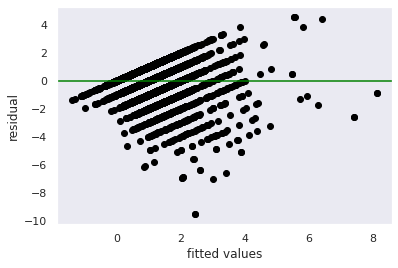

In [ ]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

In [ ]:
# heteroskedasticity test using barletts test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


the variances are homogeneous!


## **Logistic Regression**

In [ ]:
# Creating the X and y variables

X = match.iloc[:, [0, 1, 2, 3, 4, 5, 6]]
y = match.status

print(X.head())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(y.head())

   home_team    away_team  home_score  ...  tournament_type home_rank  away_rank
0     Sweden  Switzerland           1  ...         Friendly         4          3
1     Sweden       France           1  ...            Other         4         12
2  Argentina         Peru           2  ...            Other         5         70
3  Argentina         Peru           2  ...            Other         5         70
4  Argentina         Peru           2  ...            Other         5         70

[5 rows x 7 columns]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    Loss
1    Draw
2     Win
3     Win
4     Win
Name: status, dtype: object


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
y_pred = logistic.predict(X_test)

# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Measuring the accuracy of the model
print("The accuracy of the model is", {accuracy_score(y_test, y_pred)})


[[ 706  796  585]
 [ 453 1723  249]
 [ 363  183 3474]]
The accuracy of the model is {0.6918659165494608}


- The results from the confusion matrix tell us that 706 wins were correctly predicted and 796 796 wins were predicted to be a loss and 585 wins were predicted to be a draw.
- The results from the confusion matrix tell us that 1723 loss were correctly predicted and 453 loss were predicted to be a win and 249 loss were predicted to be a draw.
- The results from the confusion matrix tell us that 3474 draws were correctly predicted and 363 draws were predicted to be a win and 183 draws were predicted to be a loss.

Only 796 wins,1723 losses and 3474 draws were correctly predicted.


**Conclusion**


Logistic Regression could predict with 69% accuracy whether a team would win, draw or loose at home based on the tounament, if the ground was neutral and home team and away team FIFA ranking.

Overall the accuracy is generally low. To increase the accuracy of the model an increase in variables can improve accuracy in prediction significantly.